In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import functools
import sys

sys.path.append('../src')
import tdoa_datasets_module as tdoa

In [2]:
# Settings
# sizes of windows to run detections methods on
window_sizes = [2000, 6000, 10000, 30000]

original_gcc_phat = functools.partial(tdoa.gcc_phat, high_freq_cutoff=False)
methods = {"org_gcc_phat": original_gcc_phat, "gcc_phat": tdoa.gcc_phat}

# runs methods on all data with ground truth
experiments, recordings = tdoa.get_data_paths(
    "../data/", with_ground_truth=True)
results_path = "data_for_plotting"


# create folders
if not os.path.exists(results_path):
    os.mkdir(results_path)
for method_name in methods:
    if not os.path.exists(results_path + "/" + method_name):
        os.mkdir(results_path + "/" + method_name)

for window_size in window_sizes:
    for method_name in methods:
        for experiment in experiments:
            for recording_folder in recordings[experiments[0]]:
                tdoa_chunk_estimation, tdoa_chunk_gt = tdoa.evaluate_tdoa_estimator_on_recording(
                    methods[method_name], recording_folder, chunk_length=window_size)
 #               res = (tdoa_chunk_estimation -
#       tdoa_chunk_gt)[np.tril_indices(tdoa_chunk_estimation.shape[0], k=-1)]
                np.save(results_path + "/" + method_name + "/" + recording_folder.split("/")
                        [-1] + "_" + str(window_size), tdoa_chunk_estimation)
                np.save(results_path + "/" + method_name + "/" + recording_folder.split("/")
                        [-1] + "_" + str(window_size)+"_gt", tdoa_chunk_gt)


../data/tdoa_20201016//data/music_0015
141/3440
611/3440
1090/3440
1566/3440
2032/3440
2505/3440
2977/3440
../data/tdoa_20201016//data/music_0012
270/3120
751/3120
1229/3120
1711/3120
2191/3120
2674/3120
../data/tdoa_20201016//data/music_0013
169/2501
1026/2501
1883/2501
../data/tdoa_20201016//data/music_0014
278/3340
762/3340
1241/3340
1713/3340
2168/3340
2640/3340
3107/3340
../data/tdoa_20201016//data/chirp_0004
352/1968
830/1968
1308/1968
1787/1968
../data/tdoa_20201016//data/music_0009
287/2821
762/2821
1242/2821
1720/2821
2199/2821
2682/2821
../data/tdoa_20201016//data/chirp_0002
391/1301
869/1301
../data/tdoa_20201016//data/metronom_0021
352/2736
822/2736
1283/2736
1760/2736
2225/2736
2702/2736
../data/tdoa_20201016//data/music_0008
293/2241
770/2241
1246/2241
1723/2241
2193/2241
../data/tdoa_20201016//data/music_0011
269/2870
720/2870
1188/2870
1657/2870
2129/2870
2601/2870
../data/tdoa_20201016//data/music_0010
303/2871
779/2871
1256/2871
1729/2871
2203/2871
2679/2871
../data/t

In [36]:
from glob import glob
methods = [t.split("/")[-1] for t in glob("data_for_plotting/*")]
exps = glob("data_for_plotting/" + methods[0] + "/*")

experiments = set()
window_sizes = set()
for t in exps:
    if t.split("_")[-1].split(".")[0] == "gt":
        continue
    window_sizes.add(t.split("_")[-1].split(".")[0])
    experiments.add("_".join(t.split("/")[-1].split("_")[:-1]))
experiments = list(experiments)
window_sizes = list(window_sizes)


(array([ 100.,  100.,  101.,  128., 7897., 1971.,  119.,   71.,  125.,
          80.]),
 array([-15192.63999244, -12119.626976  ,  -9046.61395956,  -5973.60094312,
         -2900.58792669,    172.42508975,   3245.43810619,   6318.45112263,
          9391.46413906,  12464.4771555 ,  15537.49017194]),
 <BarContainer object of 10 artists>)

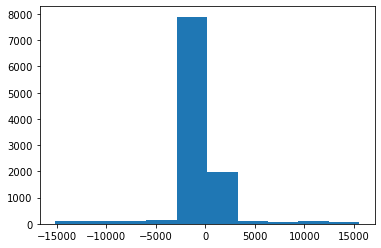

In [17]:
dets = np.load(results_path + "/" + method_name + "/" +
               recording_folder.split("/")[-1] + "_" + str(window_size) + ".npy")
gt = np.load(results_path + "/" + method_name + "/" +
             recording_folder.split("/")[-1] + "_" + str(window_size) + "_gt.npy")
res = (dets - gt)[np.tril_indices(dets.shape[0], k=-1)].flatten()
plt.hist(res)


In [ ]:
org_tdoa_chunk_estimation, org_tdoa_chunk_gt = tdoa.evaluate_tdoa_estimator_on_recording(
    original_gcc_phat, recording_folder, chunk_length=10000)
tdoa_chunk_estimation, tdoa_chunk_gt = tdoa.evaluate_tdoa_estimator_on_recording(
    tdoa.gcc_phat, recording_folder, chunk_length=10000)


res2 = (org_tdoa_chunk_estimation -
        org_tdoa_chunk_gt)[np.tril_indices(org_tdoa_chunk_estimation.shape[0], k=-1)]

# plt.plot(np.sum((abs(res) < 30),axis=0),'.')
f, (ax1, ax2) = plt.subplots(1, 2)
f.suptitle(recording_folder.split("/")[-1])
cutoff = 100
ax1.hist(res.flatten(), 100, range=(-cutoff, cutoff))
np.sum((abs(res) < cutoff))/np.prod(res.shape)
ax1.set_title(
    f'With cutoff = {(np.sum((abs(res) < cutoff))/np.prod(res.shape)):.2f}')
# np.std(res[(abs(res) < cutoff)])

cutoff = 100
ax2.hist(res2.flatten(), 100, range=(-cutoff, cutoff))
ax2.set_title(
    f'Vanilla GCC-PHAT = {(np.sum((abs(res2) < cutoff))/np.prod(res2.shape)):.2f}')
# np.std(res[(abs(res) < cutoff)])


Text(0.5, 1.0, 'With cutoff = 0.15')

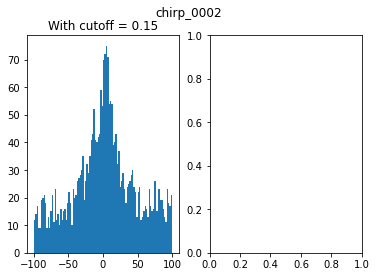

In [39]:
# os.mkdir("data_for_plotting")
np.save("./data_for_plotting/temp", res)
ww = np.load("./data_for_plotting/temp.npy")


In [3]:
recordings


{'../data/tdoa_20201016/': ['../data/tdoa_20201016//data/music_0015',
  '../data/tdoa_20201016//data/music_0012',
  '../data/tdoa_20201016//data/music_0013',
  '../data/tdoa_20201016//data/music_0014',
  '../data/tdoa_20201016//data/chirp_0004',
  '../data/tdoa_20201016//data/music_0009',
  '../data/tdoa_20201016//data/chirp_0002',
  '../data/tdoa_20201016//data/metronom_0021',
  '../data/tdoa_20201016//data/music_0008',
  '../data/tdoa_20201016//data/music_0011',
  '../data/tdoa_20201016//data/music_0010',
  '../data/tdoa_20201016//data/chirp_0001',
  '../data/tdoa_20201016//data/metronom_0022',
  '../data/tdoa_20201016//data/iregchirp_0007',
  '../data/tdoa_20201016//data/iregchirp_0006']}